In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import math
from sklearn.metrics import mean_squared_error
import yfinance as yf
from yahoofinancials import YahooFinancials


**In this section, we want to build the LSTM model for the Google stock price prediction, first, we collect the data from yahoo for start of year 2014 till the end of year 2018 and create a plot**

In [7]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2018,12,31)
google = yf.download('GOOG', start=start, end=end, progress=False)

<AxesSubplot:xlabel='Date'>

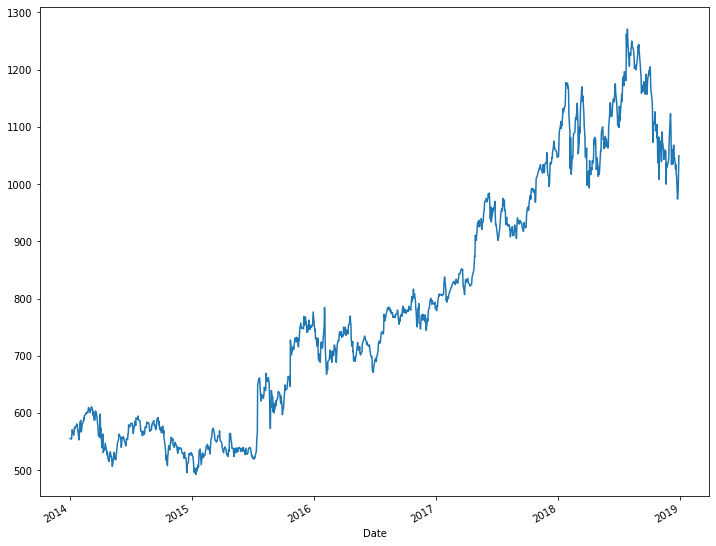

In [8]:
google['Open'].plot(label = 'Goolge open price', figsize=(12, 10))

**Next we use minmaxscaler to scale our Google data**

In [9]:
google1 = google.reset_index()['Close']


In [10]:
scaler1= MinMaxScaler()
google1= scaler1.fit_transform(np.array(google1).reshape(-1,1))
google1

array([[0.08142832],
       [0.07622344],
       [0.08412049],
       ...,
       [0.70549274],
       [0.7111804 ],
       [0.70243018]])

**We divide our data to test and train set, we use 80% of the data for training and the rest for testing**

In [11]:
google_train_data, google_test_data = google1[0: int(len(google1)*0.8)], google1[int(len(google1)*0.8) :]


In [12]:
google_train_data.shape, google_test_data.shape

((1005, 1), (252, 1))

**We creat a function to divide our train data and test data into X_train, y_train and X_test, y_train respectivelly**

In [13]:
timestep=1

def create_data(dataset, timestep):
    dataX = []
    dataY=[]
    for i in range (len(dataset)-timestep-1):
        dataX.append(dataset[i:(i+timestep), 0])
        dataY.append(dataset[i+timestep, 0])
    return np.array(dataX),  np.array(dataY)
    

In [14]:
google_X_train, google_y_train = create_data(google_train_data, 100)
google_X_test, google_y_test = create_data(google_test_data, 100)

In [15]:
google_X_train.dtype

dtype('float64')

In [16]:
google_X_train.shape, google_y_train.shape, google_X_test.shape, google_y_test.shape

((904, 100), (904,), (151, 100), (151,))

**For the LSTM model we need our data to be 3 dimensional, so we reshape our X_train and X_test data by adding 1 to the third dimension**

In [17]:
google_X_train = google_X_train.reshape(google_X_train.shape[0], google_X_train.shape[1], 1)
google_X_test = google_X_test.reshape(google_X_test.shape[0], google_X_test.shape[1], 1)

**Next we create our LSTM model**

In [18]:
google_model = Sequential()
google_model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
#google_model.add(LSTM(50, return_sequences=True))
google_model.add(LSTM(50))
google_model.add(Dense(1))
google_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])



In [19]:
google_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


**We fit our data to our model with epochs=100, batch_size 64**

In [20]:
history = google_model.fit(google_X_train, google_y_train, validation_data=(google_X_test, google_y_test), epochs=100, batch_size=32, verbose=1)


Epoch 1/100
29/29 [==============================] - 5s 77ms/step - loss: 0.0436 - acc: 2.3126e-04 - val_loss: 0.0025 - val_acc: 0.0066
Epoch 2/100
29/29 [==============================] - 1s 44ms/step - loss: 0.0016 - acc: 0.0015 - val_loss: 0.0025 - val_acc: 0.0066
Epoch 3/100
29/29 [==============================] - 1s 49ms/step - loss: 7.1704e-04 - acc: 0.0018 - val_loss: 0.0023 - val_acc: 0.0066
Epoch 4/100
29/29 [==============================] - 1s 44ms/step - loss: 7.5567e-04 - acc: 0.0012 - val_loss: 0.0024 - val_acc: 0.0066
Epoch 5/100
29/29 [==============================] - 1s 42ms/step - loss: 8.3868e-04 - acc: 3.6730e-04 - val_loss: 0.0023 - val_acc: 0.0066
Epoch 6/100
29/29 [==============================] - 1s 41ms/step - loss: 7.6995e-04 - acc: 0.0013 - val_loss: 0.0023 - val_acc: 0.0066
Epoch 7/100
29/29 [==============================] - 1s 41ms/step - loss: 6.7088e-04 - acc: 0.0015 - val_loss: 0.0021 - val_acc: 0.0066
Epoch 8/100
29/29 [=============================

Epoch 60/100
29/29 [==============================] - 1s 41ms/step - loss: 2.7905e-04 - acc: 0.0013 - val_loss: 8.8384e-04 - val_acc: 0.0066
Epoch 61/100
29/29 [==============================] - 1s 41ms/step - loss: 2.5399e-04 - acc: 6.4296e-04 - val_loss: 8.0878e-04 - val_acc: 0.0066
Epoch 62/100
29/29 [==============================] - 1s 43ms/step - loss: 2.9169e-04 - acc: 5.8168e-04 - val_loss: 8.1932e-04 - val_acc: 0.0066
Epoch 63/100
29/29 [==============================] - 1s 41ms/step - loss: 2.8001e-04 - acc: 0.0023 - val_loss: 0.0010 - val_acc: 0.0066
Epoch 64/100
29/29 [==============================] - 1s 43ms/step - loss: 2.6685e-04 - acc: 1.8959e-04 - val_loss: 7.7374e-04 - val_acc: 0.0066
Epoch 65/100
29/29 [==============================] - 1s 43ms/step - loss: 2.5726e-04 - acc: 6.4296e-04 - val_loss: 8.2505e-04 - val_acc: 0.0066
Epoch 66/100
29/29 [==============================] - 1s 43ms/step - loss: 2.8301e-04 - acc: 0.0020 - val_loss: 7.8152e-04 - val_acc: 0.0066
E

**we can see from our model that the loss is decreassing**

**Next we predict our train set and test set and use inverse_scalaer to convert the data back to normal**

In [21]:
google_train_pred= google_model.predict(google_X_train)
google_test_pred = google_model.predict(google_X_test)

In [22]:
google_train_pred.shape

(904, 1)

In [23]:
google_train_pred = scaler1.inverse_transform(google_train_pred)
google_test_pred = scaler1.inverse_transform(google_test_pred)
google_train_data= scaler1.inverse_transform(google_train_data)
google_test_data= scaler1.inverse_transform(google_test_data)


**We use the RMSE(standard deviation of residuals) both for training and testing data, to compute the accuracy of our model, relative to our dataset, the RMSE gave us a good score!**

In [24]:
math.sqrt(mean_squared_error(google_y_test, google_test_pred))

1127.0875866391787

In [25]:
math.sqrt(mean_squared_error(google_y_train, google_train_pred))

732.73432039727

**We use our predicted test data and predicted train data to plot our prediction. The blue line shows the actual prices, the orange shows our train data and the green line shows our test data. From the plot, we can see that our model did a good job predicting the stock price!**

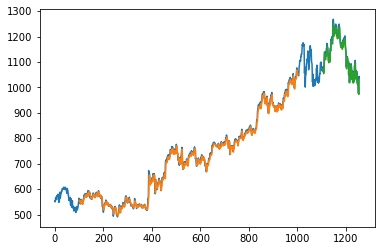

In [26]:
timestep2= 100
google_train_plot = np.empty_like(google1)
google_train_plot[:, :]=np.nan
google_train_plot[timestep2:len(google_train_pred)+timestep2, :] = google_train_pred
google_test_plot = np.empty_like(google1)
google_test_plot[:, :] = np.nan
google_test_plot[len(google_train_pred)+(timestep2*2)+1:len(google1)-1, :] = google_test_pred
plt.plot(scaler1.inverse_transform(google1))
plt.plot(google_train_plot)
plt.plot(google_test_plot)
plt.show()

In [27]:
google_test_pred= google_test_pred.tolist()

In [34]:
gg = google['Close'][-151:] 


In [35]:
def extractDigits(lst):
    return [[el] for el in lst]
goog = extractDigits(gg)

In [36]:
df_goog = pd.DataFrame (goog, columns=['actual'])

In [38]:
df_google = pd.DataFrame (google_test_pred, columns=['Prediction'])
df_google['Actual'] = goog

In [39]:
df_google['Actual'] =  df_google['Actual'].str.get(0)

In [40]:
df_google.head(10)

,Prediction,Actual
0,1063.747803,1079.239990
1,1071.380005,1075.660034
2,1072.961670,1060.319946
3,1069.114014,1067.800049
4,1054.420410,1084.989990
5,1060.207275,1119.500000
6,1078.456787,1139.290039
7,1111.860107,1139.660034
8,1132.000366,1136.880005
9,1130.726929,1123.859985


**The result shows that the our prediction did a relatively good job predicting the stock prices, the prediction was close to the actual price for the most part!**